In [81]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
import numpy as np
import matplotlib.pyplot as plt
import lib_python
import plot_conv
import plot_conv_sub

# Load the forcing contribution

In [85]:
globals_dict = ept.emu_plot(run_name="/efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79",
                            expvar_space='y');

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79

Reading /efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79/output/recon1d_qsw.data'>
<_io.BufferedReader name='/efs_ecco/wjiang/emu_runs/real_conv/emu_conv_18_18_3_mask.crudespg_1_79/output/recon1d_saltflux.dat

In [90]:
import ecco_v4_py as e4p

In [91]:
varexp = e4p.llc_compact_to_tiles(globals_dict['return_vars']['expvar_vs_space'])

llc_compact_to_faces: dims, llc  (8, 1170, 90) 90
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (8, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  float32


In [92]:
grid = xr.open_dataset('/efs_ecco/wjiang/data_folder/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')
xx = np.array(grid.XC).ravel()
yy = np.array(grid.YC).ravel()

In [93]:
import cartopy.crs as ccrs
projection = ccrs.LambertConformal(central_longitude = -55)

In [94]:
import cmocean
cmap = cmocean.cm.balance

In [97]:
import cartopy.feature as cfeature
extent = (-70,40,-30,30)

# This is the subroutine for plotting

/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorr

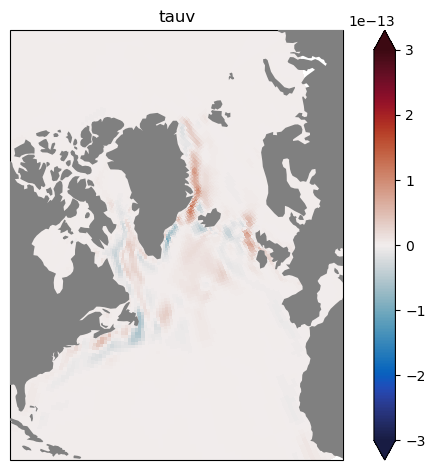

In [98]:
vmax = 3e-13
for term_ind in range(8):
    plt.clf()
    ax = plt.axes(projection = projection)
    for i in [2,10,6]:
        plt.pcolormesh(grid.XC[i],grid.YC[i],varexp[term_ind,i],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
    plt.title(globals_dict['return_vars']['ctrl_name'][term_ind])
    # ax.tricontourf(xx,yy,varexp[2].ravel(),levels = 50,transform = ccrs.PlateCarree())
    plt.colorbar(extend = 'both')
    ax.set_extent((-80,-10,15,90))
    ax.add_feature(cfeature.LAND,facecolor = 'grey',zorder = 10)
    plt.tight_layout()
    plt.savefig(globals_dict['return_vars']['ctrl_name'][term_ind]+'_conv.png')